In [1]:
# from google_auth_oauthlib import flow
#
# # TODO: Uncomment the line below to set the `launch_browser` variable.
# launch_browser = True
# #
# # The `launch_browser` boolean variable indicates if a local server is used
# # as the callback URL in the auth flow. A value of `True` is recommended,
# # but a local server does not work if accessing the application remotely,
# # such as over SSH or from a remote Jupyter notebook.
#
# appflow = flow.InstalledAppFlow.from_client_secrets_file(
#     'client_secrets.json',
#     scopes=['https://www.googleapis.com/auth/bigquery'])
#
# if launch_browser:
#     appflow.run_local_server()
# else:
#     appflow.run_console()
#
# credentials = appflow.credentials

In [2]:
from google.oauth2 import service_account

# TODO(developer): Set key_path to the path to the service account key
#                  file.
# key_path = "path/to/service_account.json"
from spade_proto.auxiliary import perform_query

credentials = service_account.Credentials.from_service_account_file(
    'service-account-file.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [3]:
from google.cloud import bigquery_storage

bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)

In [4]:
from google.cloud import bigquery

client = bigquery.Client(project="hazel-form-273711", credentials=credentials)

In [5]:
# QUERY = ("""
# SELECT
#   MonthYear,
#   EventRootCode,
#   COUNT(*) as Count,
#   SUM( AvgTone ) as SumAvgTone,
#   AVG( AvgTone ) as AvgAvgTone,
# FROM
#   `gdelt-bq.gdeltv2.events`
# WHERE
#   Year >= 2021
#   AND Actor1CountryCode = "DEU"
#   AND Actor2CountryCode= "POL"
# GROUP BY
#   MonthYear,
#   EventRootCode
# """
# )

In [6]:
# Perform a query.
# query_job = client.query(QUERY)  # API request
# results = query_job.result()  # Waits for query to finish

In [7]:
# dataframe = results.to_dataframe(bqstorage_client=bqstorageclient)

In [8]:
# print(dataframe.head())

In [9]:
# for row in dataframe:
#     print(row)

In [10]:
import pandas as pd
# print(dataframe)

QUERY = ("""SELECT
  MonthYear,
  COUNT(*) as Count
FROM
  `gdelt-bq.gdeltv2.events`
WHERE
  Year >= 2015
  AND Actor1CountryCode = "DEU"
GROUP BY
  MonthYear"""
                     )
DEUmonthyear = perform_query(clients=[client, bqstorageclient], QUERY=QUERY)
DEUmonthyear["Time"] = pd.to_datetime(DEUmonthyear['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

In [13]:
DEUmonthyear

,MonthYear,Count,Time
0,201703,141803,2017-03
1,201605,96453,2016-05
2,201712,65011,2017-12
3,201612,115808,2016-12
4,201611,103271,2016-11
...,...,...,...
72,202101,48040,2021-01
73,201808,80277,2018-08
74,201911,63058,2019-11
75,201803,89718,2018-03


In [ ]:
QUERY = ("""SELECT
  MonthYear,
  COUNT(*) AS Count
FROM
  `gdelt-bq.gdeltv2.events`
WHERE
  Year >= 2015
  AND Actor1CountryCode = "DEU"
  AND Actor2CountryCode= "POL"
GROUP BY
  MonthYear"""
                     )
DEUPOLmonthyear = perform_query(clients=[client, bqstorageclient], QUERY=QUERY)
DEUPOLmonthyear["Time"] = pd.to_datetime(DEUPOLmonthyear['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

In [14]:
DEUPOLmonthyear

,MonthYear,Count,Time
0,201605,615,2016-05
1,201805,440,2018-05
2,201703,965,2017-03
3,201611,666,2016-11
4,201602,828,2016-02
...,...,...,...
72,201809,579,2018-09
73,201704,521,2017-04
74,201512,595,2015-12
75,201504,1100,2015-04


In [15]:
# todo change to function
s = DEUPOLmonthyear.groupby(["Time"]).agg({'Count': 'sum'})
t = DEUmonthyear.groupby(["Time"]).agg({'Count': 'sum'})

s['Count'] = s['Count'] / t['Count']
s['Country'] = 'POL'

s

,Count,Country
Time,,
2015-01,0.007890,POL
2015-02,0.006092,POL
2015-03,0.004841,POL
2015-04,0.013395,POL
2015-05,0.010798,POL
...,...,...
2021-01,0.005808,POL
2021-02,0.012494,POL
2021-03,0.007692,POL


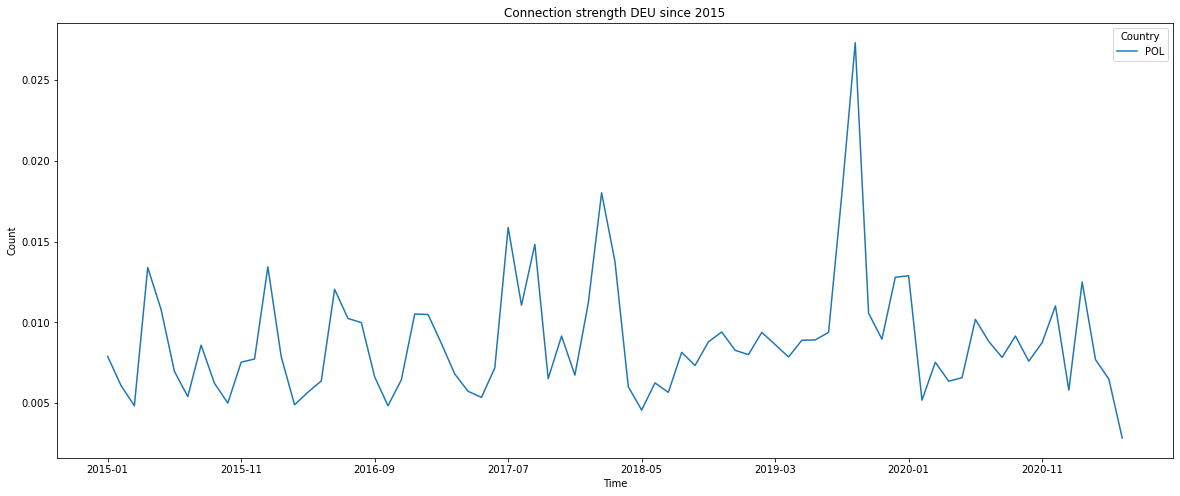

In [16]:
s = s.groupby(["Time", "Country"]).agg({'Count': 'sum'})
g = s.unstack().plot(y='Count')
g
g.set(ylabel='Count')
g.set_title("Connection strength DEU since 2015")
g.figure.set_size_inches(20, 8)


In [12]:
g

<AxesSubplot:title={'center':'Connection strength DEU since 2015'}, xlabel='Time', ylabel='Count'>